# Packages

In [1]:
import sys
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split
import random
import cebra
from cebra import CEBRA
import cebra.grid_search
import time
import joblib as jl
from matplotlib.collections import LineCollection
import cebra.integrations.plotly
import os
import torch
%matplotlib inline

In [2]:
conf_dir = "/scratch/09117/xz6783/Xu/PL_miniscope/PL/Analysis/Cat_Odor_Conflict/Conflict/extracted_data/Calcium"
source_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/data"
output_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/output"
model_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/visualization/models"
animal_id = '2N6'

# 1. Dataset

In [3]:
Dt = pd.read_csv(os.path.join(source_dir, f'{animal_id}.csv'), index_col= 0)
# Split
Y = Dt.iloc[:, 0:7]
X = Dt.iloc[:, 7:]
# View data
Dt

Timepoint         Time     Speed  Freezing  In Food Area  \
0             1     0.503476  0.033189       0.0           1.0   
1             2     1.541000  0.037854       0.0           1.0   
2             3     2.552700  0.031945       0.0           1.0   
3             4     3.564800  0.030437       0.0           1.0   
4             5     4.577300  0.036552       0.0           1.0   
...         ...          ...       ...       ...           ...   
1765       1766  1770.098000  0.032000       0.0           1.0   
1766       1767  1770.098000  0.032000       0.0           1.0   
1767       1768  1770.098000  0.032000       0.0           1.0   
1768       1769  1770.098000  0.032000       0.0           1.0   
1769       1770  1770.098000  0.032000       0.0           1.0   

      In Hidden Area  Bar Press active         0         1         2  ...  \
0                0.0          0.404298  0.000000  0.000000  0.000000  ...   
1                0.0          0.000000  0.000000  0.000000  0.000000  ...   
2                0.0          0.000000  0.000000  0.000000  0.098338  ...   
3                0.0          0.000000  0.000000  0.000000  0.177742  ...   
4                0.0          0.000000  0.000000  0.000000  1.830645  ...   
...              ...               ...       ...       ...       ...  ...   
1765             0.0          0.000000  0.465820  0.000012  0.091607  ...   
1766             0.0          0.000000  0.435238  0.000011  0.082245  ...   
1767             0.0          0.000000  0.406665  0.000010  0.073840  ...   
1768             0.0          0.000000  0.379967  0.000008  0.066293  ...   
1769             0.0          0.000000  0.354427  0.000007  0.059361  ...   

            105       106       107       108       109        110       111  \
0      0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  2.555697   
...         ...       ...       ...       ...       ...        ...       ...   
1765  12.268571  0.020547  5.303245  1.382171  1.253797  12.874539  0.000898   
1766  11.843147  0.018865  5.274349  1.265059  1.089541  12.298258  0.000790   
1767  11.832817  0.017321  4.939243  1.157869  0.946804  11.747771  0.000696   
1768  13.299452  0.015903  4.625428  1.059762  0.822766  11.221925  0.000612   
1769  12.550375  0.014571  4.324528  0.967855  0.712532  10.707448  0.000537   

           112       113       114  
0     0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  
2     0.000000  0.000000  0.000000  
3     0.000000  0.000000  0.000000  
4     0.000000  0.000000  0.000000  
...        ...       ...       ...  
1765  0.062508  0.021159  0.227671  
1766  0.057494  0.018038  0.216932  
1767  0.052881  0.015377  0.206700  
1768  0.048639  0.013109  0.196950  
1769  0.044645  0.011132  0.187435  

[1770 rows x 122 columns]

In [4]:
X

0         1         2         3         4         5  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.098338  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.177742  0.000000  0.000000  0.000000   
4     0.000000  0.000000  1.830645  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...   
1765  0.465820  0.000012  0.091607  0.064932  0.049717  3.297028   
1766  0.435238  0.000011  0.082245  0.044564  0.046371  2.872533   
1767  0.406665  0.000010  0.073840  0.030585  0.043250  2.502692   
1768  0.379967  0.000008  0.066293  0.020991  0.040339  2.180468   
1769  0.354427  0.000007  0.059361  0.014280  0.037560  1.893350   

                 6    7          8         9  ...        105       106  \
0     0.000000e+00  0.0   1.970130  0.000000  ...   0.000000  0.000000   
1     0.000000e+00  0.0  13.053889  0.000000  ...   0.000000  0.000000   
2     0.000000e+00  0.0  13.479717  0.000000  ...   0.000000  0.000000   
3     0.000000e+00  0.0  14.391106  0.000000  ...   0.000000  0.000000   
4     8.578416e-01  0.0  15.494152  0.000000  ...   0.000000  0.000000   
...            ...  ...        ...       ...  ...        ...       ...   
1765  6.185039e-09  0.0   8.377986  0.154059  ...  12.268571  0.020547   
1766  0.000000e+00  0.0   7.795587  0.139116  ...  11.843147  0.018865   
1767  0.000000e+00  0.0   7.206373  0.125623  ...  11.832817  0.017321   
1768  0.000000e+00  0.0   6.661694  0.113439  ...  13.299452  0.015903   
1769  0.000000e+00  0.0   7.890469  0.102180  ...  12.550375  0.014571   

           107       108       109        110       111       112       113  \
0     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000   0.000000  2.555697  0.000000  0.000000   
...        ...       ...       ...        ...       ...       ...       ...   
1765  5.303245  1.382171  1.253797  12.874539  0.000898  0.062508  0.021159   
1766  5.274349  1.265059  1.089541  12.298258  0.000790  0.057494  0.018038   
1767  4.939243  1.157869  0.946804  11.747771  0.000696  0.052881  0.015377   
1768  4.625428  1.059762  0.822766  11.221925  0.000612  0.048639  0.013109   
1769  4.324528  0.967855  0.712532  10.707448  0.000537  0.044645  0.011132   

           114  
0     0.000000  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.000000  
...        ...  
1765  0.227671  
1766  0.216932  
1767  0.206700  
1768  0.196950  
1769  0.187435  

[1770 rows x 115 columns]

# 2. Model setup

## (1). Train test split

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2024)

# Sort dataset by row index
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

## (2). Hyperparameter setup

distance = 'cosine'
time_offsets = 10
batch_size = None
learning_rate = 0.001
conditional = 'time_delta'
output_dimension = 3
num_hidden_units = 50
max_iterations = 10000
temperature = 1

# 3. Model building

## (1). [Freezing, In Hidden Area]

## Best Model Hyperparameters

In [6]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 1) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 1) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 1) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 1) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 1) {animal_id}.csv'), index_col=0)

In [7]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
14   cosine             auto            10         NaN          0.001   

   conditional  output_dimension  num_hidden_units  max_iterations  \
14  time_delta                15                75            7500   

    Accuracy_Testing  
14          5.805725

In [8]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()


### These hyperparameters are used to build up models which only vary a parameter for temperature

In [9]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb1 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb1 = cebra_behavior_model_comb1.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb1 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb1 = cebra_behavior_model_00001_comb1.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb1 = cebra_behavior_model_01_comb1.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb1 = cebra_behavior_model_2_comb1.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb1 = cebra_behavior_model_3_comb1.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb1 = cebra_behavior_model_5_comb1.transform(X_train)

pos: -0.5721 neg:  7.4483 total:  6.8762 temperature:  1.0000: 100%|██████████| 10000/10000 [04:47<00:00, 34.80it/s]
pos: -996.4615 neg:  1001.7750 total:  5.3135 temperature:  0.0010: 100%|██████████| 10000/10000 [04:31<00:00, 36.85it/s]
pos: -7.3399 neg:  13.1326 total:  5.7927 temperature:  0.1000: 100%|██████████| 10000/10000 [04:22<00:00, 38.04it/s]
pos: -0.2933 neg:  7.3452 total:  7.0519 temperature:  2.0000: 100%|██████████| 10000/10000 [04:17<00:00, 38.81it/s]
pos: -0.2004 neg:  7.3118 total:  7.1115 temperature:  3.0000: 100%|██████████| 10000/10000 [04:10<00:00, 39.97it/s]
pos: -0.1194 neg:  7.2886 total:  7.1692 temperature:  5.0000: 100%|██████████| 10000/10000 [04:16<00:00, 38.93it/s]


In [10]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [11]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb1 = cebra_time_model_025_comb1.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb1 = cebra_time_model_05_comb1.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb1 = cebra_time_model_075_comb1.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb1 = cebra_time_model_125_comb1.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb1 = cebra_time_model_15_comb1.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb1 = cebra_time_model_175_comb1.transform(X_train)

pos: -2.3740 neg:  8.6851 total:  6.3112 temperature:  0.2500: 100%|██████████| 10000/10000 [04:18<00:00, 38.68it/s]
pos: -1.1247 neg:  7.7569 total:  6.6322 temperature:  0.5000: 100%|██████████| 10000/10000 [04:19<00:00, 38.50it/s]
pos: -0.7455 neg:  7.5293 total:  6.7838 temperature:  0.7500: 100%|██████████| 10000/10000 [04:20<00:00, 38.38it/s]
pos: -0.4617 neg:  7.4080 total:  6.9463 temperature:  1.2500: 100%|██████████| 10000/10000 [04:21<00:00, 38.26it/s]
pos: -0.3833 neg:  7.3786 total:  6.9953 temperature:  1.5000: 100%|██████████| 10000/10000 [04:19<00:00, 38.54it/s]
pos: -0.3453 neg:  7.3603 total:  7.0150 temperature:  1.7500: 100%|██████████| 10000/10000 [04:21<00:00, 38.21it/s]


In [12]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [13]:
# Extract outcomes
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()

# Model
cebra_behavior_model_comb1 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb1.fit(X_train, y_train_comb)
cebra_behavior_model_comb1_embedding = cebra_behavior_model_comb1.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss1 = cebra_behavior_model_comb1.state_dict_['loss']

pos: -0.2947 neg:  7.3446 total:  7.0499 temperature:  2.0000: 100%|██████████| 10000/10000 [04:15<00:00, 39.21it/s]


In [14]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [15]:
np.random.seed(999)
# Extract outcomes
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()

# Model_shuffled
cebra_behavior_model_comb1_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb1_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb1_embedding_shuffled = cebra_behavior_model_comb1_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss1_shuffled = cebra_behavior_model_comb1_shuffled.state_dict_['loss']

pos: -0.2488 neg:  7.3379 total:  7.0891 temperature:  2.0000: 100%|██████████| 10000/10000 [04:27<00:00, 37.38it/s]


In [16]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [17]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb1_embedding {animal_id}.csv"), cebra_behavior_model_comb1_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb1_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb1_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss1, os.path.join(model_dir,f"InfoNCELoss1 {animal_id}.pt"))
torch.save(InfoNCELoss1_shuffled, os.path.join(model_dir,f"InfoNCELoss1_shuffled {animal_id}.pt"))


## (2). [In Food Area, Bar Press Active]

## Best Model Hyperparameters

In [18]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 2) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 2) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 2) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 2) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 2) {animal_id}.csv'), index_col=0)

In [19]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
13   cosine             auto            10         NaN          0.001   

   conditional  output_dimension  num_hidden_units  max_iterations  \
13  time_delta                15                50            7500   

    Accuracy_Testing  
13          5.749227

In [20]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1

In [21]:
y_train_comb = y_train.iloc[:, [4, 6]].to_numpy()

In [22]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb2 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb2 = cebra_behavior_model_comb2.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb2 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb2 = cebra_behavior_model_00001_comb2.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb2 = cebra_behavior_model_01_comb2.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb2 = cebra_behavior_model_2_comb2.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb2 = cebra_behavior_model_3_comb2.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb2 = cebra_behavior_model_5_comb2.transform(X_train)

pos: -0.5807 neg:  7.4108 total:  6.8301 temperature:  1.0000: 100%|██████████| 10000/10000 [04:18<00:00, 38.75it/s]
pos: -996.5431 neg:  1001.8054 total:  5.2623 temperature:  0.0010: 100%|██████████| 10000/10000 [04:25<00:00, 37.64it/s]
pos: -7.2324 neg:  12.9967 total:  5.7643 temperature:  0.1000: 100%|██████████| 10000/10000 [04:30<00:00, 37.02it/s]
pos: -0.3497 neg:  7.3379 total:  6.9881 temperature:  2.0000: 100%|██████████| 10000/10000 [04:14<00:00, 39.34it/s]
pos: -0.2486 neg:  7.3033 total:  7.0547 temperature:  3.0000: 100%|██████████| 10000/10000 [04:08<00:00, 40.26it/s]
pos: -0.1406 neg:  7.2740 total:  7.1334 temperature:  5.0000: 100%|██████████| 10000/10000 [04:09<00:00, 40.16it/s]


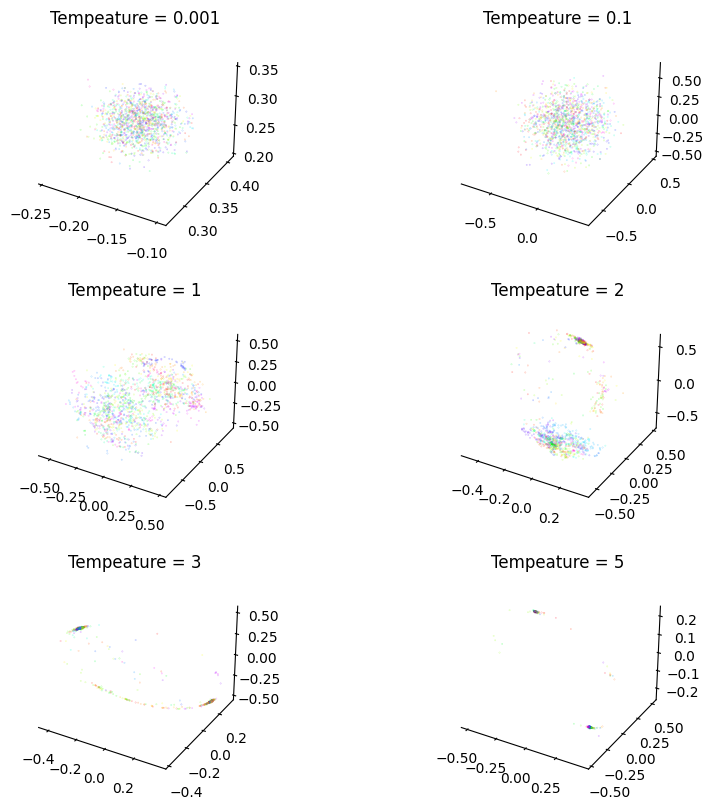

In [23]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [24]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb2 = cebra_time_model_025_comb2.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb2 = cebra_time_model_05_comb2.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb2 = cebra_time_model_075_comb2.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb2 = cebra_time_model_125_comb2.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb2 = cebra_time_model_15_comb2.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb2 = cebra_time_model_175_comb2.transform(X_train)

pos: -2.2694 neg:  8.5201 total:  6.2508 temperature:  0.2500: 100%|██████████| 10000/10000 [04:06<00:00, 40.52it/s]
pos: -1.0652 neg:  7.6535 total:  6.5883 temperature:  0.5000: 100%|██████████| 10000/10000 [04:02<00:00, 41.30it/s]
pos: -0.7588 neg:  7.4847 total:  6.7259 temperature:  0.7500: 100%|██████████| 10000/10000 [04:02<00:00, 41.30it/s]
pos: -0.4927 neg:  7.3789 total:  6.8862 temperature:  1.2500: 100%|██████████| 10000/10000 [04:09<00:00, 40.10it/s]
pos: -0.4206 neg:  7.3606 total:  6.9400 temperature:  1.5000: 100%|██████████| 10000/10000 [04:09<00:00, 40.10it/s]
pos: -0.3940 neg:  7.3485 total:  6.9545 temperature:  1.7500: 100%|██████████| 10000/10000 [04:06<00:00, 40.54it/s]


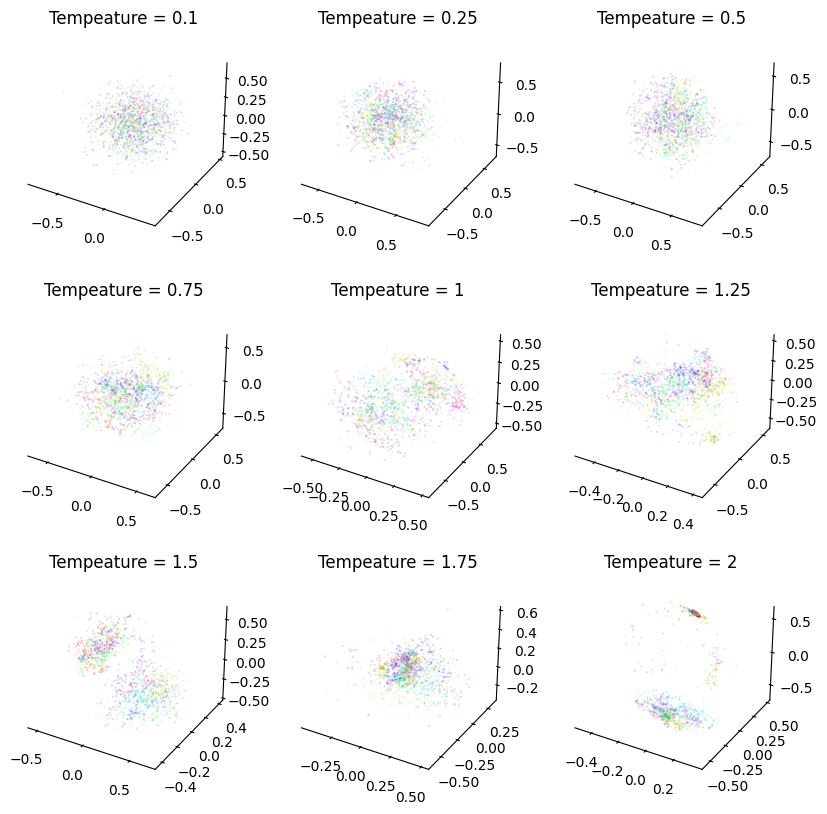

In [25]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [26]:
# Extract outcomes
y_train_comb = y_train.iloc[:, [4, 6]].to_numpy()

# Model
cebra_behavior_model_comb2 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb2.fit(X_train, y_train_comb)
cebra_behavior_model_comb2_embedding = cebra_behavior_model_comb2.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss2 = cebra_behavior_model_comb2.state_dict_['loss']

pos: -0.3475 neg:  7.3363 total:  6.9888 temperature:  2.0000: 100%|██████████| 10000/10000 [04:07<00:00, 40.46it/s]


In [27]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[In Food Area, Bar Press Active]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [28]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb2_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb2_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb2_embedding_shuffled = cebra_behavior_model_comb2_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss2_shuffled = cebra_behavior_model_comb2_shuffled.state_dict_['loss']

pos: -0.2460 neg:  7.3304 total:  7.0843 temperature:  2.0000: 100%|██████████| 10000/10000 [04:09<00:00, 40.09it/s]


In [29]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[In Food Area, Bar Press Active] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [30]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb2_embedding {animal_id}.csv"), cebra_behavior_model_comb2_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb2_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb2_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss2, os.path.join(model_dir,f"InfoNCELoss2 {animal_id}.pt"))
torch.save(InfoNCELoss2_shuffled, os.path.join(model_dir,f"InfoNCELoss2_shuffled {animal_id}.pt"))


## (3). [Freezing, In Hidden Area, In Food Area, Bar Press Active]

## Best Model Hyperparameters

In [31]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 3) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 3) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 3) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 3) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 3) {animal_id}.csv'), index_col=0)

In [32]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
14   cosine             auto            10         NaN          0.001   

   conditional  output_dimension  num_hidden_units  max_iterations  \
14  time_delta                15                75            7500   

    Accuracy_Testing  
14          5.579184

In [33]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1

In [34]:
y_train_comb = y_train.iloc[:, [3,4,5,6]].to_numpy()

In [35]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb3 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb3 = cebra_behavior_model_comb3.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb3 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb3 = cebra_behavior_model_00001_comb3.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb3 = cebra_behavior_model_01_comb3.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb3 = cebra_behavior_model_2_comb3.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb3 = cebra_behavior_model_3_comb3.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb3 = cebra_behavior_model_5_comb3.transform(X_train)

pos: -0.6292 neg:  7.4012 total:  6.7720 temperature:  1.0000: 100%|██████████| 10000/10000 [04:23<00:00, 37.93it/s]
pos: -996.5660 neg:  1001.7369 total:  5.1709 temperature:  0.0010: 100%|██████████| 10000/10000 [04:26<00:00, 37.57it/s]
pos: -7.2681 neg:  12.7754 total:  5.5073 temperature:  0.1000: 100%|██████████| 10000/10000 [04:26<00:00, 37.46it/s]
pos: -0.3757 neg:  7.3248 total:  6.9491 temperature:  2.0000: 100%|██████████| 10000/10000 [04:32<00:00, 36.75it/s]
pos: -0.2419 neg:  7.2886 total:  7.0467 temperature:  3.0000: 100%|██████████| 10000/10000 [04:29<00:00, 37.12it/s]
pos: -0.1453 neg:  7.2685 total:  7.1231 temperature:  5.0000: 100%|██████████| 10000/10000 [04:32<00:00, 36.70it/s]


In [36]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [37]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb3 = cebra_time_model_025_comb3.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb3 = cebra_time_model_05_comb3.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb3 = cebra_time_model_075_comb3.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb3 = cebra_time_model_125_comb3.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb3 = cebra_time_model_15_comb3.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb3 = cebra_time_model_175_comb3.transform(X_train)

pos: -2.2352 neg:  8.3627 total:  6.1275 temperature:  0.2500: 100%|██████████| 10000/10000 [04:30<00:00, 36.92it/s]
pos: -1.1704 neg:  7.6053 total:  6.4349 temperature:  0.5000: 100%|██████████| 10000/10000 [04:28<00:00, 37.27it/s]
pos: -0.8252 neg:  7.4566 total:  6.6314 temperature:  0.7500: 100%|██████████| 10000/10000 [04:29<00:00, 37.04it/s]
pos: -0.5353 neg:  7.3681 total:  6.8328 temperature:  1.2500: 100%|██████████| 10000/10000 [04:32<00:00, 36.75it/s]
pos: -0.4593 neg:  7.3500 total:  6.8906 temperature:  1.5000: 100%|██████████| 10000/10000 [04:32<00:00, 36.72it/s]
pos: -0.3953 neg:  7.3382 total:  6.9429 temperature:  1.7500: 100%|██████████| 10000/10000 [04:39<00:00, 35.82it/s]


In [38]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [39]:
# Model
cebra_behavior_model_comb3 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb3.fit(X_train, y_train_comb)
cebra_behavior_model_comb3_embedding = cebra_behavior_model_comb3.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss3 = cebra_behavior_model_comb3.state_dict_['loss']

pos: -0.3607 neg:  7.3250 total:  6.9643 temperature:  2.0000: 100%|██████████| 10000/10000 [04:36<00:00, 36.16it/s]


In [40]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area, In Food Area, Bar Press Active]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [41]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb3_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb3_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb3_embedding_shuffled = cebra_behavior_model_comb3_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss3_shuffled = cebra_behavior_model_comb3_shuffled.state_dict_['loss']

pos: -0.2595 neg:  7.3156 total:  7.0561 temperature:  2.0000: 100%|██████████| 10000/10000 [04:28<00:00, 37.25it/s]


In [42]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area, In Food Area, Bar Press Active] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [43]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb3_embedding {animal_id}.csv"), cebra_behavior_model_comb3_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb3_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb3_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss3, os.path.join(model_dir,f"InfoNCELoss3 {animal_id}.pt"))
torch.save(InfoNCELoss3_shuffled, os.path.join(model_dir,f"InfoNCELoss3_shuffled {animal_id}.pt"))

## (4). [Speed]

## Best Model Hyperparameters

In [44]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 4) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 4) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 4) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 4) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 4) {animal_id}.csv'), index_col=0)

In [45]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
14   cosine             auto            10         NaN         0.0001   

   conditional  output_dimension  num_hidden_units  max_iterations  \
14  time_delta                15                75            7500   

    Accuracy_Testing  
14          6.924695

In [46]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1
y_train_comb = y_train.iloc[:, [2]].to_numpy()

In [47]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb4 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb4 = cebra_behavior_model_comb4.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb4 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb4 = cebra_behavior_model_00001_comb4.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb4 = cebra_behavior_model_01_comb4.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb4 = cebra_behavior_model_2_comb4.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb4 = cebra_behavior_model_3_comb4.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb4 = cebra_behavior_model_5_comb4.transform(X_train)

pos: -0.4608 neg:  7.4833 total:  7.0225 temperature:  1.0000: 100%|██████████| 10000/10000 [04:25<00:00, 37.60it/s]
pos: -997.9952 neg:  1004.7755 total:  6.7802 temperature:  0.0010: 100%|██████████| 10000/10000 [04:27<00:00, 37.41it/s]
pos: -8.0627 neg:  14.8005 total:  6.7378 temperature:  0.1000: 100%|██████████| 10000/10000 [04:13<00:00, 39.44it/s]
pos: -0.2397 neg:  7.3500 total:  7.1104 temperature:  2.0000: 100%|██████████| 10000/10000 [04:11<00:00, 39.83it/s]
pos: -0.1619 neg:  7.3028 total:  7.1410 temperature:  3.0000: 100%|██████████| 10000/10000 [04:12<00:00, 39.65it/s]
pos: -0.0911 neg:  7.2736 total:  7.1825 temperature:  5.0000: 100%|██████████| 10000/10000 [04:15<00:00, 39.11it/s]


In [48]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [ ]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb4 = cebra_time_model_025_comb4.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb4 = cebra_time_model_05_comb4.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb4 = cebra_time_model_075_comb4.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb4 = cebra_time_model_125_comb4.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb4 = cebra_time_model_15_comb4.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb4 = cebra_time_model_175_comb4.transform(X_train)

pos: -2.4257 neg:  9.2558 total:  6.8301 temperature:  0.2500: 100%|██████████| 10000/10000 [04:50<00:00, 34.45it/s]
pos: -0.9747 neg:  7.9038 total:  6.9290 temperature:  0.5000: 100%|██████████| 10000/10000 [05:08<00:00, 32.44it/s]
pos: -0.6269 neg:  7.5982 total:  6.9713 temperature:  0.7500:  82%|████████▏ | 8188/10000 [04:11<00:56, 32.25it/s]

In [ ]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [ ]:
# Model
cebra_behavior_model_comb4 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb4.fit(X_train, y_train_comb)
cebra_behavior_model_comb4_embedding = cebra_behavior_model_comb4.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss4 = cebra_behavior_model_comb4.state_dict_['loss']

In [ ]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Speed]",
                                                           cmap = "gist_rainbow")
fig.show()

In [ ]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb4_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb4_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb4_embedding_shuffled = cebra_behavior_model_comb4_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss4_shuffled = cebra_behavior_model_comb4_shuffled.state_dict_['loss']

In [ ]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Speed] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

In [ ]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb4_embedding {animal_id}.csv"), cebra_behavior_model_comb4_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb4_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb4_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss4, os.path.join(model_dir,f"InfoNCELoss4 {animal_id}.pt"))
torch.save(InfoNCELoss4_shuffled, os.path.join(model_dir,f"InfoNCELoss4_shuffled {animal_id}.pt"))

# 4. Model evaluation

In [58]:
InfoNCELoss1 = torch.load(os.path.join(model_dir, f"InfoNCELoss1 {animal_id}.pt"))
InfoNCELoss1_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss1_shuffled {animal_id}.pt"))
InfoNCELoss2 = torch.load(os.path.join(model_dir, f"InfoNCELoss2 {animal_id}.pt"))
InfoNCELoss2_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss2_shuffled {animal_id}.pt"))
InfoNCELoss3 = torch.load(os.path.join(model_dir, f"InfoNCELoss3 {animal_id}.pt"))
InfoNCELoss3_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss3_shuffled {animal_id}.pt"))
InfoNCELoss4 = torch.load(os.path.join(model_dir, f"InfoNCELoss4 {animal_id}.pt"))
InfoNCELoss4_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss4_shuffled {animal_id}.pt"))

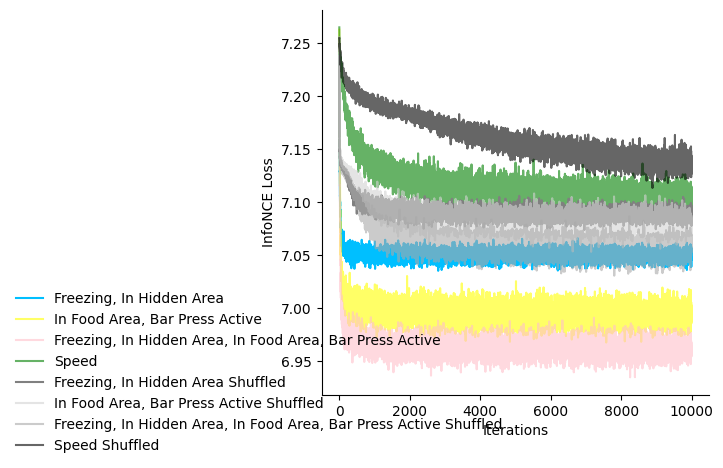

In [59]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(InfoNCELoss1, c='deepskyblue', label = 'Freezing, In Hidden Area')
ax.plot(InfoNCELoss2, c='yellow', alpha = 0.6, label = 'In Food Area, Bar Press Active')
ax.plot(InfoNCELoss3, c='pink', alpha=0.6,label = 'Freezing, In Hidden Area, In Food Area, Bar Press Active')
ax.plot(InfoNCELoss4, c='green', alpha=0.6,label = 'Speed')
ax.plot(InfoNCELoss1_shuffled, c='gray', label = 'Freezing, In Hidden Area Shuffled')
ax.plot(InfoNCELoss2_shuffled, c='lightgray', alpha = 0.6, label = 'In Food Area, Bar Press Active Shuffled')
ax.plot(InfoNCELoss3_shuffled, c='darkgray', alpha=0.6,label = 'Freezing, In Hidden Area, In Food Area, Bar Press Active Shuffled')
ax.plot(InfoNCELoss4_shuffled, c='black', alpha=0.6,label = 'Speed Shuffled')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Iterations')
ax.set_ylabel('InfoNCE Loss')
plt.legend(bbox_to_anchor=(0.5,0.3), frameon = False )
plt.show()

In [60]:
cebra_behavior_model_comb1_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb1_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb2_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb2_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb3_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb3_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb4_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb4_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb1_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb1_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb2_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb2_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb3_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb3_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb4_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb4_embedding_shuffled {animal_id}.csv"), delimiter = ',')


In [61]:
fig=plt.figure(figsize=(10,6))
ax1=plt.subplot(241, projection = '3d')
ax2=plt.subplot(242, projection = '3d')
ax3=plt.subplot(243, projection = '3d')
ax4=plt.subplot(244, projection = '3d')
ax5=plt.subplot(245, projection = '3d')
ax6=plt.subplot(246, projection = '3d')
ax7=plt.subplot(247, projection = '3d')
ax8=plt.subplot(248, projection = '3d')

ax1 = cebra.plot_embedding(ax=ax1, embedding=cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance Shuffled",
                                                           cmap = "gist_rainbow")

ax2 = cebra.plot_embedding(ax=ax2, embedding=cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach Shuffled",
                                                           cmap = "gist_rainbow")

ax3 = cebra.plot_embedding(ax=ax3, embedding=cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach Shuffled",
                                                           cmap = "gist_rainbow")

ax4 = cebra.plot_embedding(ax=ax4, embedding=cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed Shuffled",
                                                           cmap = "gist_rainbow")

ax5 = cebra.plot_embedding(ax=ax5, embedding=cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance",
                                                           cmap = "gist_rainbow")

ax6 = cebra.plot_embedding(ax=ax6, embedding=cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach",
                                                           cmap = "gist_rainbow")

ax7 = cebra.plot_embedding(ax=ax7, embedding=cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach",
                                                           cmap = "gist_rainbow")
ax8 = cebra.plot_embedding(ax=ax8, embedding=cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed",
                                                           cmap = "gist_rainbow")

ax1.title.set_size(6)
ax2.title.set_size(6)
ax3.title.set_size(6)
ax4.title.set_size(6)
ax5.title.set_size(6)
ax6.title.set_size(6)
ax7.title.set_size(6)
ax8.title.set_size(6)

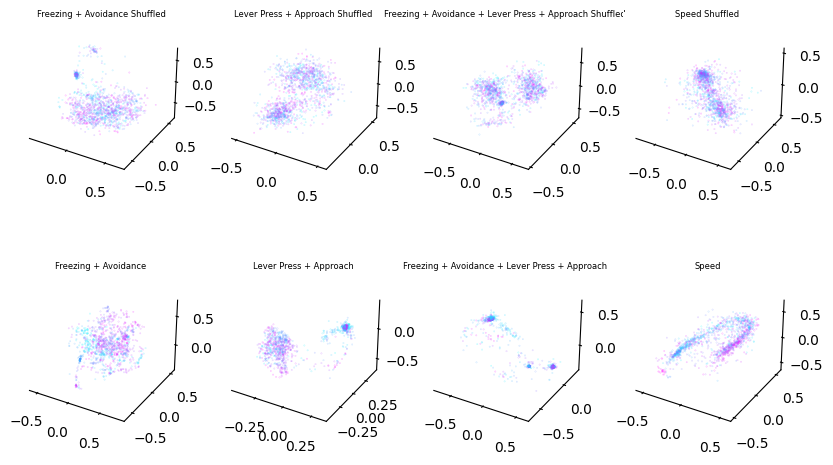

In [62]:
fig=plt.figure(figsize=(10,6))
ax1=plt.subplot(241, projection = '3d')
ax2=plt.subplot(242, projection = '3d')
ax3=plt.subplot(243, projection = '3d')
ax4=plt.subplot(244, projection = '3d')
ax5=plt.subplot(245, projection = '3d')
ax6=plt.subplot(246, projection = '3d')
ax7=plt.subplot(247, projection = '3d')
ax8=plt.subplot(248, projection = '3d')

ax1 = cebra.plot_embedding(ax=ax1, embedding=cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance Shuffled",
                                                           cmap = "cool")

ax2 = cebra.plot_embedding(ax=ax2, embedding=cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach Shuffled",
                                                           cmap = "cool")

ax3 = cebra.plot_embedding(ax=ax3, embedding=cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach Shuffled",
                                                           cmap = "cool")

ax4 = cebra.plot_embedding(ax=ax4, embedding=cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed Shuffled",
                                                           cmap = "cool")

ax5 = cebra.plot_embedding(ax=ax5, embedding=cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance",
                                                           cmap = "cool")

ax6 = cebra.plot_embedding(ax=ax6, embedding=cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach",
                                                           cmap = "cool")

ax7 = cebra.plot_embedding(ax=ax7, embedding=cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach",
                                                           cmap = "cool")
ax8 = cebra.plot_embedding(ax=ax8, embedding=cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed",
                                                           cmap = "cool")

ax1.title.set_size(6)
ax2.title.set_size(6)
ax3.title.set_size(6)
ax4.title.set_size(6)
ax5.title.set_size(6)
ax6.title.set_size(6)
ax7.title.set_size(6)
ax8.title.set_size(6)